# Python Solution Notebook: Logistic Regression

**Problem 3: Python 3 Implementation**
- To generate an imbalanced dataset
- To fit logistic regression
- To evaluate the logistic regression model with ROC and PR

In [279]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [257]:
my_class_sep = 1

# Generate synthetic data
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=5,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    weights=[0.8, 0.2], # [0.95, 0.05],  # [0.8, 0.2] imbalance: 80% controls, 20% cases
    class_sep=my_class_sep,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [258]:
# Set up the pipeline: standardize then logistic regression
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

# Train the logistic regression model
lr_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('lr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work 

In [259]:
# Examine the model

# coef_ is a 2D numpy array but has only 1 row
print(f'shape of coef_: {lr_pipeline.named_steps["lr"].coef_.shape}')

# intercept_ is a 1D numpy array but has only one item
print(f'shape of intercept_: {lr_pipeline.named_steps["lr"].intercept_.shape}')

# flatten the 2D array into a 1D array for plotting
coef = lr_pipeline.named_steps["lr"].coef_.ravel()
print(f'shape of coef_.ravel(): {coef.shape}')

# get the intercept
intercept = lr_pipeline.named_steps["lr"].intercept_[0]

shape of coef_: (1, 20)
shape of intercept_: (1,)
shape of coef_.ravel(): (20,)


In [271]:
# REPORT the coefficients and intercept

print('\nCoefficients:')
print(coef)

print('\nIntercept:')
print(intercept)


Coefficients:
[ 0.08362569 -0.07497526 -0.79372745 -0.103042    0.66988565 -0.01510371
 -0.06588517  0.01978486 -0.06494286  0.0035368   0.31598567 -0.57606337
 -0.08117867 -0.23553397 -0.00447836 -0.04080713 -0.008995    0.0495638
  0.0343469  -0.07426837]

Intercept:
-1.976050753019121


Text(0.5, 0, '$j$')

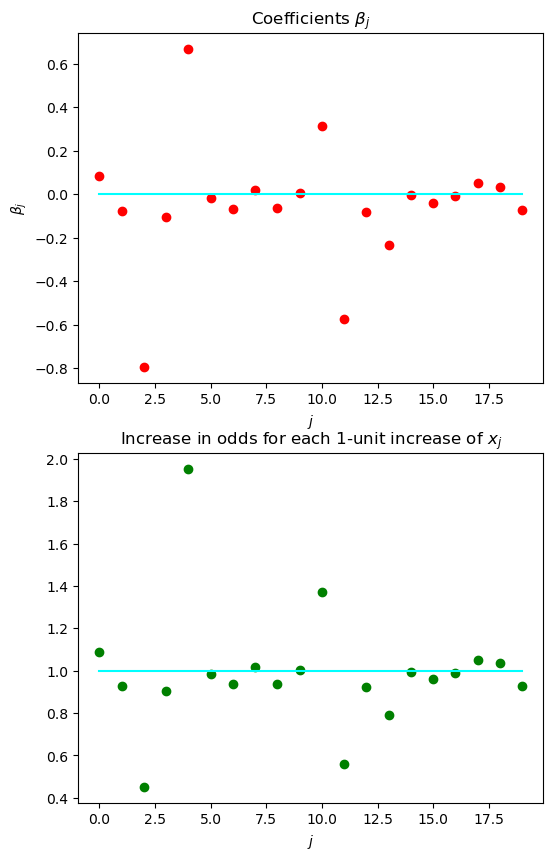

In [270]:
# plot the coefficients and the corresponding odds increase

fig, axs = plt.subplots(2, 1, figsize=(6, 10))

# plot the coefficients
x_axis_values = list(range(len(coef)))
axs[0].scatter(x_axis_values, coef, color="red")
axs[0].plot([min(x_axis_values), max(x_axis_values)], [0, 0], color='cyan')
axs[0].set_title(r"Coefficients $\beta_j$")
axs[0].set_xlabel(r"$j$")
axs[0].set_ylabel(r"$\beta_j$")

# plot the odds
odds = np.exp(coef)

axs[1].scatter(x_axis_values, odds, color="green")
axs[1].plot([min(x_axis_values), max(x_axis_values)], [1, 1], color='cyan')
axs[1].set_title(r"Increase in odds for each 1-unit increase of $x_j$")
axs[1].set_xlabel(r"$j$")


Probabilities of the first 5 samples:
[1.40221968e-01 2.55201603e-02 1.33845057e-03 1.18665543e-02
 5.22047231e-02 1.38535220e-01 6.34593842e-01 1.64948647e-01
 3.91824802e-01 1.53716407e-01 1.37477236e-01 6.46105489e-02
 4.43509268e-02 6.82780839e-03 4.33599308e-02 3.57760670e-02
 5.83997018e-01 1.25449391e-01 5.75331196e-01 1.81042838e-01
 5.53339550e-02 6.79369767e-03 6.00197154e-01 4.78257726e-04
 1.79140771e-01 8.96370389e-02 1.21010433e-02 1.28286370e-02
 4.33850281e-01 9.37561501e-02 4.10495115e-01 9.09484187e-03
 2.53911231e-02 3.63462998e-01 4.56189644e-02 1.30658731e-01
 2.61134844e-01 2.13587370e-02 5.05782594e-01 8.24366028e-01
 2.43914553e-02 1.04395785e-01 3.15307286e-01 3.96660708e-02
 2.49403701e-01 1.67677142e-02 1.03638012e-01 3.24317892e-02
 5.01537271e-01 1.40519065e-01 2.93888265e-01 3.13193576e-01
 2.35809681e-02 3.00907659e-01 1.81135977e-01 3.18065042e-02
 2.28518096e-01 4.78229903e-01 3.23125512e-02 5.26225599e-02
 6.39436185e-02 5.05965521e-01 2.00300289e-01 

Text(0, 0.5, 'predicted probability')

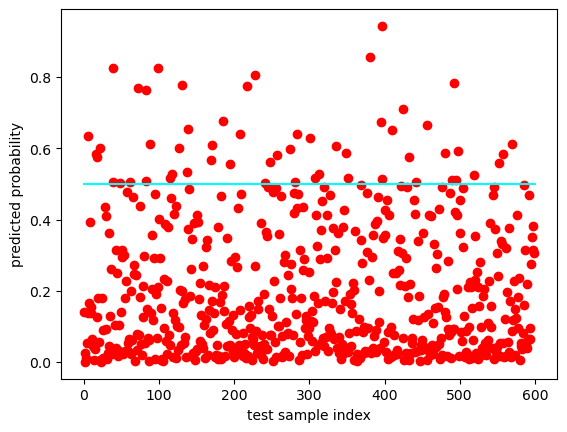

In [276]:
# Predicted probabilities for first 5 samples in test set
proba_test = lr_pipeline.predict_proba(X_test)[:, 1]
print('\nProbabilities of the first 5 samples:')
print(proba_test)

# plot the probabilities for all of the test samples
fig, ax = plt.subplots()
ax.scatter(list(range(X_test.shape[0])), proba_test, color='red')
ax.plot([0, X_test.shape[0]], [0.5, 0.5], color='cyan')
ax.set_xlabel('test sample index')
ax.set_ylabel('predicted probability')

In [286]:
# Compute the confusion matrix
proba_threshold_list = [0.5, 0.7, 0.9]

for cur_proba_threshold in proba_threshold_list:
    print(f'Probability threshold: {cur_proba_threshold}')
    y_pred = (proba_test >= cur_proba_threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    print("True Positive Rate:", tpr)
    print("False Positive Rate:", fpr, '\n')

# # Plot confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

Probability threshold: 0.5
Confusion Matrix:
 [[449  29]
 [ 95  27]]
True Positive Rate: 0.22131147540983606
False Positive Rate: 0.060669456066945605 

Probability threshold: 0.7
Confusion Matrix:
 [[468  10]
 [121   1]]
True Positive Rate: 0.00819672131147541
False Positive Rate: 0.02092050209205021 

Probability threshold: 0.9
Confusion Matrix:
 [[477   1]
 [122   0]]
True Positive Rate: 0.0
False Positive Rate: 0.0020920502092050207 



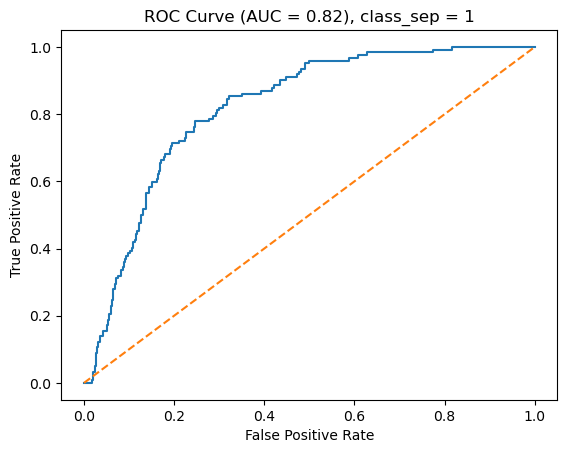

AUC = 0.82


In [263]:
# ROC and AUC
fpr, tpr, roc_thresh = roc_curve(y_test, proba_test)
auc = roc_auc_score(y_test, proba_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.2f}), class_sep = {my_class_sep}")
plt.show()

print(f'AUC = {round(auc, 2)}')

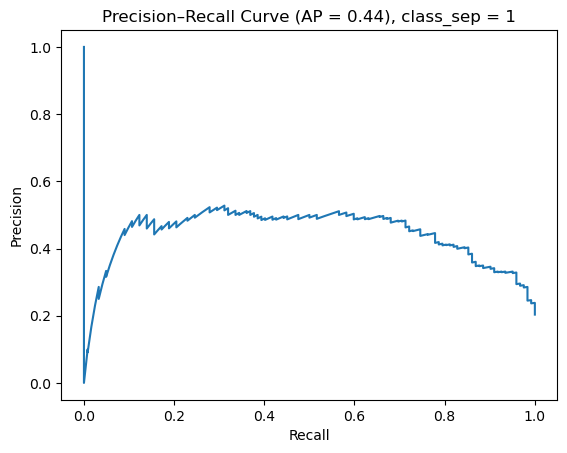

AP = 0.44


In [264]:
# Precision-Recall curve and Average Precision
prec, rec, pr_thresh = precision_recall_curve(y_test, proba_test)
ap = average_precision_score(y_test, proba_test)

plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {ap:.2f}), class_sep = {my_class_sep}")
plt.show()

print(f'AP = {round(ap, 2)}')

### Why ROC can look “good” while PR looks “bad” under imbalance?

- ROC uses **FPR**, which divides by the number of negatives (often huge). With many negatives, a model can have small FPR even with many false positives.
- PR focuses on the **positive class**: precision penalizes false positives directly.
- In rare-disease settings, PR/AP often gives a more realistic picture of clinical usefulness.